<a href="https://colab.research.google.com/github/YaelCG/DeepLearning/blob/main/HODL_SP25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SETUP

In [1]:
# Prep
import os

# Set the environment variable KERAS_BACKEND to use "tensorflow" as the backend for Keras. This can also be Tensorflow, Theano, CNTK
os.environ["KERAS_BACKEND"] = "tensorflow"

In [2]:
# Import packages
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_val, y_val) = keras.datasets.california_housing.load_data(
    version="large", path="california_housing.npz", test_split=0.2, seed=113
)

743530/743530 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## INSTRUCTIONS

### Dataset

Edited from https://keras.io/api/datasets/california_housing/

You have downloaded the California Housing dataset. This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

It's a regression dataset with 8 features. The target variable is the median house value in the census block group, in dollars.

The 8 input features are the following:

* MedInc: median income in block group
* HouseAge: median house age in block group
* AveRooms: average number of rooms per household
* AveBedrms: average number of bedrooms per household
* Population: block group population
* AveOccup: average number of household members
* Latitude: block group latitude
* Longitude: block group longitude


The 20,640 rows of data have been split into train and validation sets and stored in numpy arrays.
* `x_train`, `x_val`: numpy arrays containing the training and validation X matrices, respectively.

* `y_train`, `y_val`: numpy arrays containing the values of the dependent variable for the training and validation sets respectively. These are numbers typically between 25000 and 500000 and represent home prices in dollars.

### Assignment

To answer the questions below, feel free to use/re-use the code in the [Neural Heart Disease Prediction Model colab](https://colab.research.google.com/drive/1vfJMtyMg_9Dt8erei_I1M3ve9W98DdGU?usp=drive_link) that we covered in class.

First, standardize `x_train` and `x_val` using the mean and standard deviation of `x_train`. Then complete the following three parts.

Part I
* Define a Keras model with a single hidden layer of 16 neurons
* Use `model.compile` with `adam` as the optimizer and `mse` as the loss
* Train the Keras model for 100 epochs with `model.fit`, using a batch size of 32.
* Plot loss curves for the training and validation sets.
* Evaluate the model on the validation set and report the MSE.


Part II
* Take the Keras model you defined in Part I and add another hidden layer of 16 neurons. Then repeat the steps from Part I.

Part III
* Take the Keras model you defined in Part I. Modify it so that the input layer is ALSO connected (directly) to the output layer i.e., the output layer should be connected to the input layer *and* the hidden layer. Then repeat the steps from Part I.

Part IV

Using Keras Tuner, do hyperparameter optimization across:
- the number of layers: [1,2,3]
- the number of units in each layer: [4, 8]

(i.e., 6 hyper-parameter combinations)

Answer these questions in text cells:
* What is the optimal hyper-parameter combination?
* What is the MSE of the optimal model?
* How does this optimal model compare to the models found in Parts I, II and III?

**COMPLETE ALL THE ABOVE BY ADDING CODE AND TEXT CELLS TO THIS NOTEBOOK BELOW THIS CELL.**

In [4]:
# First I will set the seed for replication purposes
keras.utils.set_random_seed(42)

In [5]:
x_train.shape

(16512, 8)

In [6]:
# Normalization of x_train and x_val
means = x_train.mean(axis=0)
sd = x_train.std(axis=0)

x_train_norm = (x_train - means)/sd
x_val_norm = (x_val - means)/sd

# same for y variable
mean = y_train.mean()
sd = y_train.std()

y_train_norm = (y_train - mean)/sd
y_val_norm = (y_val - mean)/sd

## Part I

In [24]:
#Part I

#Define a Keras model with a single hidden layer of 16 neurons
input = keras.layers.Input(shape=x_train_norm.shape[1:]) # Define the input of the model. In this case we have 8 variables
h = keras.layers.Dense(16, activation="relu", name="Hidden")(input) # Define the only layer that will take the input, have 16 neurons, and use relu as activation function
output = keras.layers.Dense(1, activation="sigmoid", name="Output")(h) # As have a classification problem, then we use sigmoid for the last layer
model = keras.Model(input, output) # Define the model and the input-output
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden (Dense)                       │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:

#Use model.compile with adam as the optimizer and mse as the loss
model.compile(loss="mse", optimizer="adam", metrics=['accuracy'])

# Train the Keras model for 100 epochs with model.fit, using a batch size of 32.
history = model.fit(x_train_norm, y_train_norm, epochs=100, batch_size=32, validation_data=(x_val_norm, y_val_norm))


Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0000e+00 - loss: 1.0825 - val_accuracy: 0.0000e+00 - val_loss: 0.7343
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0000e+00 - loss: 0.6953 - val_accuracy: 0.0000e+00 - val_loss: 0.6729
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: 0.6521 - val_accuracy: 0.0000e+00 - val_loss: 0.6562
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 0.6384 - val_accuracy: 0.0000e+00 - val_loss: 0.6474
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0000e+00 - loss: 0.6307 - val_accuracy: 0.0000e+00 - val_loss: 0.6414
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6254 - val_accuracy: 0.0000e+00 - val_loss: 0.6372
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 0.6218 - val_accuracy: 0.0000e+00 - val_loss: 0.6341
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 

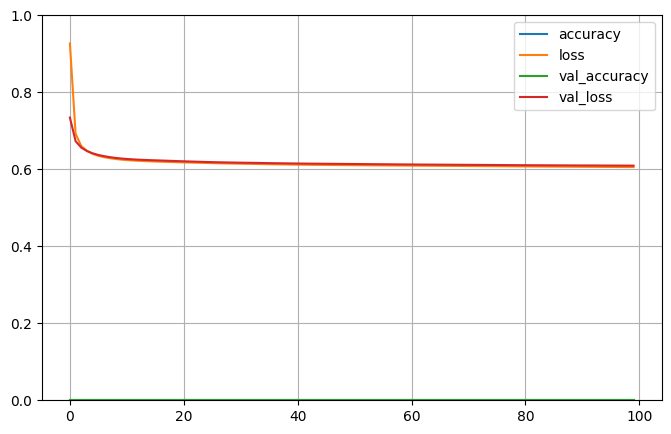

In [26]:

#Plot loss curves for the training and validation sets.
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show();

In [27]:
#Evaluate the model on the validation set and report the MSE
mse_test = model.evaluate(x_val_norm, y_val_norm)
print(mse_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6045
[0.609450101852417, 0.0]


## Part II
Take the Keras model you defined in Part I and add another hidden layer of 16 neurons. Then repeat the steps from Part I.

In [7]:
# Take the Keras model you defined in Part I and add another hidden layer of 16 neurons. Then repeat the steps from Part I.
input = keras.layers.Input(shape=x_train_norm.shape[1:])
h1 = keras.layers.Dense(16, activation="relu", name="Hidden1")(input)
h2 = keras.layers.Dense(16, activation="relu", name="Hidden2")(h1)
output = keras.layers.Dense(1, activation="sigmoid", name="Output")(h2)
model = keras.Model(input, output)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden1 (Dense)                      │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden2 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 433 (1.69 KB)

 Trainable params: 433 (1.69 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:

#Use model.compile with adam as the optimizer and mse as the loss
model.compile(loss="mse", optimizer="adam", metrics=['accuracy'])

# Train the Keras model for 100 epochs with model.fit, using a batch size of 32.
history = model.fit(x_train_norm, y_train_norm, epochs=100, batch_size=32, validation_data=(x_val_norm, y_val_norm))

Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0000e+00 - loss: 0.8622 - val_accuracy: 0.0000e+00 - val_loss: 0.6628
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6391 - val_accuracy: 0.0000e+00 - val_loss: 0.6431
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6246 - val_accuracy: 0.0000e+00 - val_loss: 0.6336
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6177 - val_accuracy: 0.0000e+00 - val_loss: 0.6283
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6136 - val_accuracy: 0.0000e+00 - val_loss: 0.6245
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0000e+00 - loss: 0.6109 - val_accuracy: 0.0000e+00 - val_loss: 0.6224
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0000e+00 - loss: 0.6092 - val_accuracy: 0.0000e+00 - val_loss: 0.6209
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 

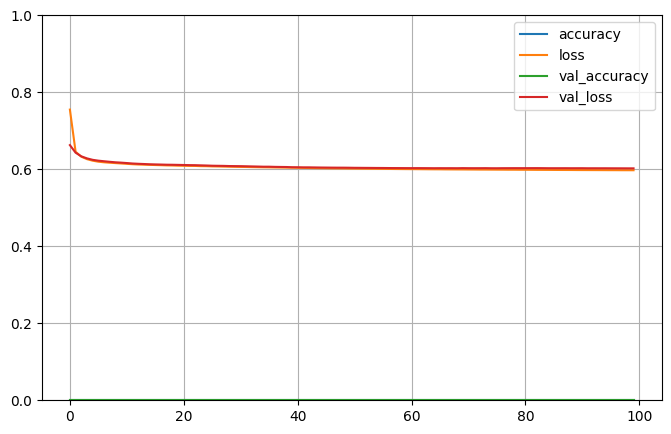

In [9]:
#Plot loss curves for the training and validation sets.
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show();

In [10]:
#Evaluate the model on the validation set and report the MSE
mse_test = model.evaluate(x_val_norm, y_val_norm)
print(mse_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: 0.5954
[0.60239177942276, 0.0]


# GPT solution

743530/743530 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 56564215808.0000 - val_loss: 56175742976.0000
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 56052678656.0000 - val_loss: 56157020160.0000
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55623569408.0000 - val_loss: 56126541824.0000
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55511019520.0000 - val_loss: 56086704128.0000
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 56007020544.0000 - val_loss: 56038617088.0000
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 55810203648.0000 - val_loss: 55983026176.0000
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 55938797568.0000 - val_loss: 55919554560.0000
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 56534040576.0000 - val_loss: 55847350272.0000
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 55718834176.0000 - val_loss: 55768084480.0000
Epoch 10/100
516/516 ━━━━━━━━━━━━━━━━

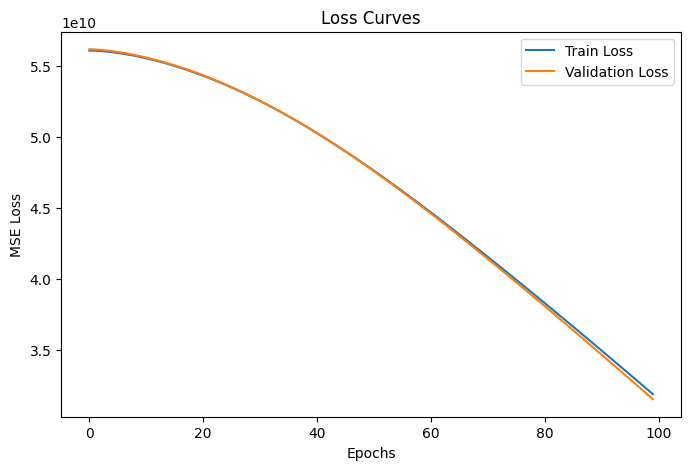

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32030230528.0000
Validation MSE: 31543953408.0


In [3]:
# Prep
import os

# Set the environment variable KERAS_BACKEND to use "tensorflow" as the backend for Keras. This can also be Tensorflow, Theano, CNTK
os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import keras

# Load your dataset (assuming x_train, x_val, y_train, y_val are already available)
(x_train, y_train), (x_val, y_val) = keras.datasets.california_housing.load_data(
    version="large", path="california_housing.npz", test_split=0.2, seed=113
)

# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

# Define the Keras model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(
    x_train_scaled, y_train,
    validation_data=(x_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)

# Plot training & validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Loss Curves')
plt.show()

# Evaluate the model on validation set
mse = model.evaluate(x_val_scaled, y_val)
print(f'Validation MSE: {mse}')
